In [1]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
from collections import Counter
plt.style.use('bmh'); sns.set()

In [2]:
# Importing CSV data  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
try:
    # Running Locally 
    price = pd.read_csv('data/price.csv')
except:
    # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
    price = pd.read_csv('data/price.csv')

--2021-04-13 14:50:20--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53592 (52K) [text/plain]
Saving to: ‘data/price.csv’

price.csv           100%[===================>]  52.34K  --.-KB/s    in 0.006s  

2021-04-13 14:50:20 (8.40 MB/s) - ‘data/price.csv’ saved [53592/53592]



In [3]:
# Dari EDA-01 - Bisa juga Load PreProcessed Data
price.drop("Observation", axis=1, inplace=True)
price.drop_duplicates(inplace=True)
price['Parking'] = price['Parking'].astype('category')
price['City_Category'] = price['City_Category'].astype('category')
price2 = price[np.abs(price.House_Price - price.House_Price.mean())<=(2*price.House_Price.std())]
price2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 0 to 931
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Dist_Taxi      918 non-null    float64 
 1   Dist_Market    918 non-null    float64 
 2   Dist_Hospital  930 non-null    float64 
 3   Carpet         923 non-null    float64 
 4   Builtup        916 non-null    float64 
 5   Parking        931 non-null    category
 6   City_Category  931 non-null    category
 7   Rainfall       931 non-null    int64   
 8   House_Price    931 non-null    int64   
dtypes: category(2), float64(5), int64(2)
memory usage: 60.3 KB


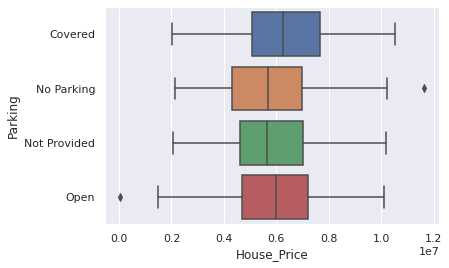

In [4]:
# BoxPlots
p = sns.boxplot(x="House_Price", y="Parking", data=price2)
# Apa makna pola yang terlihat di data oleh BoxPlot ini?

####**TUGAS 1**

In [5]:
Q1 = price2['House_Price'].quantile(0.25)
Q3 = price2['House_Price'].quantile(0.75)
IQR = Q3 - Q1
print("Q1 ={}, Q3 ={}, IQR ={}".format(Q1, Q3, IQR))

outliers_bawah = (price2['House_Price'] < (Q1 - 1.5 * IQR))
rumah_potensial = price2.loc[outliers_bawah]
rumah_potensial

Q1 =4658000.0, Q3 =7180500.0, IQR =2522500.0


,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
811,NaN,NaN,NaN,NaN,NaN,Open,CAT A,440,30000


In [6]:
Q1 = price2['House_Price'].quantile(0.25)
Q3 = price2['House_Price'].quantile(0.75)
IQR = Q3 - Q1
print("Q1 ={}, Q3 ={}, IQR ={}".format(Q1, Q3, IQR))

outliers_atas = (price2['House_Price'] > (Q3 + 1.5 * IQR))
rumah_overprice = price2.loc[outliers_atas]
rumah_overprice

Q1 =4658000.0, Q3 =7180500.0, IQR =2522500.0


,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
678,7288.0,9560.0,12531.0,1989.0,2414.0,No Parking,CAT A,860,11632000


###**TUGAS 2**

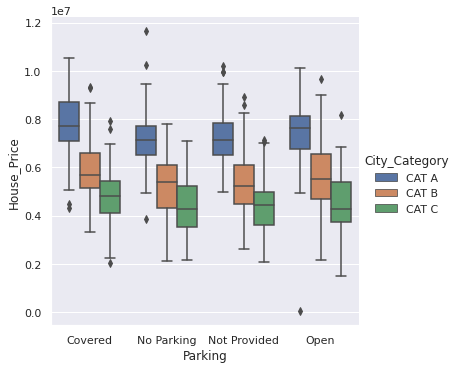

In [7]:
p = sns.catplot(x="Parking", y="House_Price", hue="City_Category", kind="box", data=price2)

####Subsetting data price2 berdasarkan "City_Category"

In [8]:
CAT_A = price2.loc[price2['City_Category'] == 'CAT A']
CAT_B = price2.loc[price2['City_Category'] == 'CAT B']
CAT_C = price2.loc[price2['City_Category'] == 'CAT C']

In [10]:
CAT_A.head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
2,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
6,13153.0,11869.0,17811.0,1542.0,1858.0,No Parking,CAT A,1030,7224000
10,4278.0,10646.0,8243.0,1187.0,1439.0,Covered,CAT A,1090,7128000
15,9648.0,14789.0,12812.0,1644.0,1950.0,Covered,CAT A,790,7887000
16,11079.0,13102.0,13076.0,1578.0,1907.0,Open,CAT A,1440,7725000


In [11]:
CAT_B.head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
3,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
5,6665.0,5142.0,9972.0,1442.0,1733.0,Open,CAT B,760,4526000


In [12]:
CAT_C.head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
7,5882.0,9948.0,13315.0,1261.0,1507.0,Open,CAT C,1020,3772000
9,8233.0,7067.0,11400.0,1030.0,1235.0,Open,CAT C,1130,4415000
20,8155.0,8085.0,9837.0,1940.0,2340.0,Covered,CAT C,980,4019000
21,9669.0,12385.0,13589.0,1421.0,1700.0,No Parking,CAT C,370,4346000
26,6615.0,8178.0,12804.0,1732.0,2073.0,Not Provided,CAT C,820,7005000


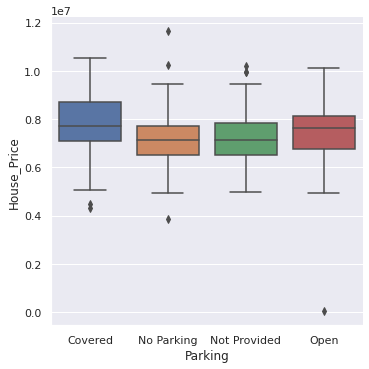

In [13]:
p = sns.catplot(x="Parking", y="House_Price", kind="box", data=CAT_A)

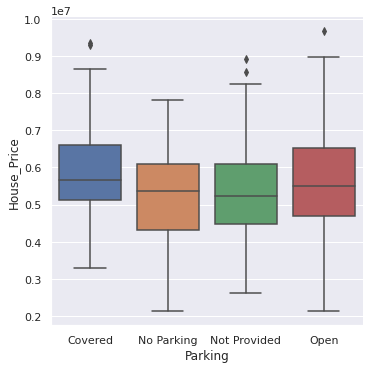

In [14]:
p = sns.catplot(x="Parking", y="House_Price", kind="box", data=CAT_B)

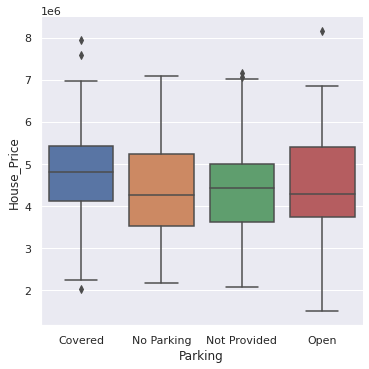

In [15]:
p = sns.catplot(x="Parking", y="House_Price", kind="box", data=CAT_C)

######Catatan: Dari hasil outliers dibawah tidak sesuai dengan jumlah outliers yang didapatkan dari bentuk boxplot yang dibuat dari setiap Kategori

In [16]:
#Outliers bawah Kategori A
Q1_A = CAT_A['House_Price'].quantile(0.25)
Q3_A = CAT_A['House_Price'].quantile(0.75)
IQR_A = Q3_A - Q1_A
print("Q1_A ={}, Q3_A ={}, IQR_A ={}".format(Q1_A, Q3_A, IQR_A))

outliers_bawah_A = (CAT_A['House_Price'] < (Q1_A - 1.5 * IQR_A))
rumah_potensial_A = CAT_A.loc[outliers_bawah_A]
rumah_potensial_A

Q1_A =6600000.0, Q3_A =8184000.0, IQR_A =1584000.0


,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
409,8773.0,13547.0,15551.0,1509.0,1799.0,No Parking,CAT A,960,3860000
811,NaN,NaN,NaN,NaN,NaN,Open,CAT A,440,30000


In [19]:
#Outliers atas Kategori A
Q1_A = CAT_A['House_Price'].quantile(0.25)
Q3_A = CAT_A['House_Price'].quantile(0.75)
IQR_A = Q3_A - Q1_A
print("Q1_A ={}, Q3_A ={}, IQR_A ={}".format(Q1_A, Q3_A, IQR_A))

outliers_atas_A = (CAT_A['House_Price'] > (Q3_A + 1.5 * IQR_A))
rumah_overprice_A = CAT_A.loc[outliers_atas_A]
rumah_overprice_A

Q1_A =6600000.0, Q3_A =8184000.0, IQR_A =1584000.0


,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
678,7288.0,9560.0,12531.0,1989.0,2414.0,No Parking,CAT A,860,11632000


In [17]:
#Outliers bawah Kategori B
Q1_B = CAT_B['House_Price'].quantile(0.25)
Q3_B = CAT_B['House_Price'].quantile(0.75)
IQR_B = Q3_B - Q1_B
print("Q1_B ={}, Q3_B ={}, IQR_B ={}".format(Q1_B, Q3_B, IQR_B))

outliers_bawah_B = (CAT_B['House_Price'] < (Q1_B - 1.5 * IQR_B))
rumah_potensial_B = CAT_B.loc[outliers_bawah_B]
rumah_potensial_B

Q1_B =4617750.0, Q3_B =6378500.0, IQR_B =1760750.0


,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price


In [20]:
#Outliers atas Kategori B
Q1_B = CAT_B['House_Price'].quantile(0.25)
Q3_B = CAT_B['House_Price'].quantile(0.75)
IQR_B = Q3_B - Q1_B
print("Q1_B ={}, Q3_B ={}, IQR_B ={}".format(Q1_B, Q3_B, IQR_B))

outliers_atas_B = (CAT_B['House_Price'] > (Q3_B + 1.5 * IQR_B))
rumah_overprice_B = CAT_B.loc[outliers_atas_B]
rumah_overprice_B

Q1_B =4617750.0, Q3_B =6378500.0, IQR_B =1760750.0


,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
725,10989.0,13153.0,13797.0,1645.0,1958.0,Covered,CAT B,530,9336000
763,8274.0,11673.0,13345.0,1641.0,1999.0,Covered,CAT B,950,9300000
930,15082.0,14700.0,19617.0,1299.0,1560.0,Open,CAT B,770,9661000


In [18]:
#Outliers bawah Kategori C
Q1_C = CAT_C['House_Price'].quantile(0.25)
Q3_C = CAT_C['House_Price'].quantile(0.75)
IQR_C = Q3_C - Q1_C
print("Q1_C ={}, Q3_C ={}, IQR_C ={}".format(Q1_C, Q3_C, IQR_C))

outliers_bawah_C = (CAT_C['House_Price'] < (Q1_C - 1.5 * IQR_C))
rumah_potensial_C = CAT_C.loc[outliers_bawah_C]
rumah_potensial_C

Q1_C =3642500.0, Q3_C =5244500.0, IQR_C =1602000.0


,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price


In [21]:
#Outliers atas Kategori C
Q1_C = CAT_C['House_Price'].quantile(0.25)
Q3_C = CAT_C['House_Price'].quantile(0.75)
IQR_C = Q3_C - Q1_C
print("Q1_C ={}, Q3_C ={}, IQR_C ={}".format(Q1_C, Q3_C, IQR_C))

outliers_atas_C = (CAT_C['House_Price'] > (Q3_C + 1.5 * IQR_C))
rumah_overprice_C = CAT_C.loc[outliers_atas_C]
rumah_overprice_C

Q1_C =3642500.0, Q3_C =5244500.0, IQR_C =1602000.0


,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
346,9119.0,11639.0,14374.0,1633.0,1968.0,Open,CAT C,330,8147000
847,8740.0,10899.0,13447.0,1873.0,2252.0,Covered,CAT C,330,7931000


In [22]:
Q1_A - 1.5 * IQR_A

4224000.0

In [23]:
CAT_A.loc[CAT_A['House_Price'] < 4224000]

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
409,8773.0,13547.0,15551.0,1509.0,1799.0,No Parking,CAT A,960,3860000
811,NaN,NaN,NaN,NaN,NaN,Open,CAT A,440,30000


###**Tugas 3**

#### Latihan Studi Kasus: Data Tips Restaurant

Sebuah dataset dari suatu Restaurant memuat variabel-variabel berikut:
*	total_bill: Total bill (cost of the meal), including tax, in US dollars
*	tip: Tip (gratuity) in US dollars
*	sex: Sex of person paying for the meal (0=male, 1=female)
*	smoker: Smoker in party? (0=No, 1=Yes)
*	day: 3=Thur, 4=Fri, 5=Sat, 6=Sun
*	time: 0=Day, 1=Night
*	size: Size of the party

https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset

In [24]:
# Loading Contoh Data studi kasus pertama di atas
tips = sns.load_dataset('tips') # Loading dari SeaBorn library's dataset
# Ukuran Data
N, P = tips.shape
print('baris = ', N, ', Kolom = ', P)

tips.head()

baris =  244 , Kolom =  7


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Latihan:

#### Silahkan Latihan untuk menjawab pertanyaan-pertanyaan berikut:

1. Adakah tipe variabel yang kurang tepat di data tersebut?
2. Apakah data numeriknya cenderung berdistribusi normal?
3. Apakah ada outlier, noise, missing values, dan-atau duplikasi data?
4. Apakah pelanggan pria dan wanita cenderung proporsional (balance)?
5. Dari data yang ada apakah Pria atau wanita ada kecenderungan memberi tips lebih besar?
6. Dari data yang ada apakah ada kecenderungan tips lebih besar di hari-hari tertentu?
7. Dari data yang ada apakah customer perokok cenderung memberi tips lebih besar?
8. Apakah pola di nomer 5 dan 7 dipengaruhi hari?
9. Pola apalagi yang dapat anda temukan? (misal, bisakah anda menyarankan tata letak kursi/meja restaurant dari data ini?)
9. Final question: dari hasil EDA anda saran apa saja yang akan anda berikan ke pemilik restaurant? 

* Skills/kompetensi apa yang terasa sangat diperlukan dari latihan ini?

1. Adakah tipe variabel yang kurang tepat di data tersebut?

In [26]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [27]:
tips["size"].unique()

array([2, 3, 4, 1, 6, 5])

Dari data tersebut, variabel "size" ada indikasi tipe variabelnya berupa kategorik, karena nilai datanya tidak disertai satuan ukuran tertentu. Rentang nilai dari data "size" tersebut juga berada pada rentang 1 sampai 6 sehingga menurut kami nilai dari "size" menunjukkan kategori tertentu

2. Apakah data numeriknya cenderung berdistribusi normal?

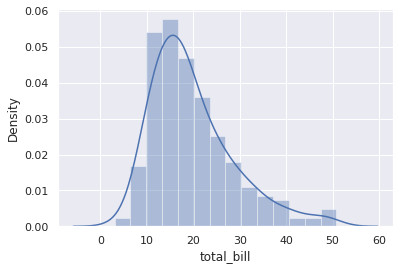

In [28]:
sns.distplot( a=tips["total_bill"])

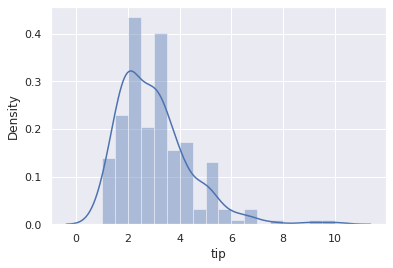

In [29]:
sns.distplot( a=tips["tip"])

In [30]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Dari dua (2) data numerik tersebut ("total_bill" & 'tip") tidak berdistribusi normal karena terlihat bahwa pola grafiknya cenderung ke kiri (skewness left). Selain itu dapat juga dilihat pada statistik deskriptif bahwa nilai rata-rata dari dua variabel tersebut lebih besar dari standar deviasi (std)nya sehingga data cenderung berada di sebelah kiri

3. Apakah ada outlier, noise, missing values, dan-atau duplikasi data?

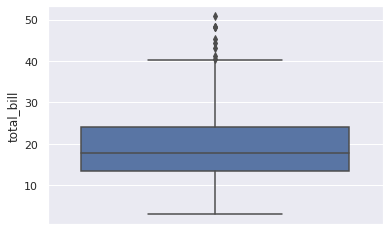

In [31]:
#Mengecek outlier pada "total_bill"
sns.boxplot( y=tips["total_bill"])

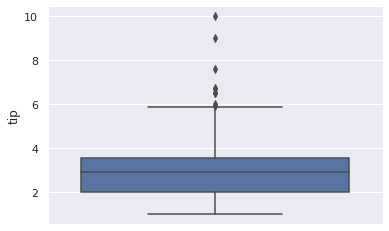

In [32]:
#Mengecek outlier pada "tip"
sns.boxplot( y=tips["tip"])

In [33]:
#Mengecek nilai dari setiap column untuk mengecek apakah ada data noise
print("=============================Data total_bill=============================\n" + str(tips["total_bill"].unique()))
print("\n================================Data tip================================\n" + str(tips["tip"].unique()))
print("\n================================Data sex================================\n" + str(tips["sex"].unique()))
print("\n================================Data smoker================================\n" + str(tips["smoker"].unique()))
print("\n================================Data day================================\n" + str(tips["day"].unique()))
print("\n================================Data time================================\n" + str(tips["time"].unique()))
print("\n================================Data size================================\n" + str(tips["size"].unique()))

=============================Data total_bill=============================
[16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
 15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
 19.82 17.81 13.37 12.69 21.7  19.65  9.55 18.35 15.06 20.69 17.78 24.06
 16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.4  18.29 22.23 32.4
 28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
 13.81 11.02 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07 26.86 25.28
 14.73 10.51 27.2  22.76 17.29 19.44 16.66 10.07 32.68 15.98 34.83 13.03
 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17 27.28 12.03 12.46
 11.35 15.38 44.3  22.42 20.92 15.36 20.49 25.21 18.24 14.31 14.    7.25
 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08 11.69 13.42 14.26 15.95
 12.48 29.8   8.52 14.52 11.38 22.82 19.08 20.27 11.17 12.26 18.26  8.51
 14.15 16.   13.16 17.47 34.3  41.19 27.05 16.43  8.35 18.64 11.87  9.78
  7.51 14.07 13.13 17.26 24.55 19.77 29.85 48.17 25

In [34]:
#Mengecek missing values pada data
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [35]:
#Mengecek data duplikat
tips.duplicated().sum()

1

4. Apakah pelanggan pria dan wanita cenderung proporsional (balance)?

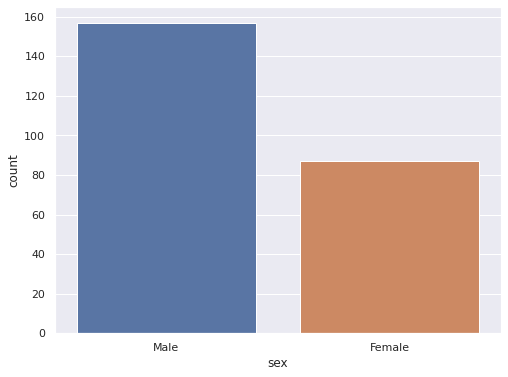

In [36]:
plt.figure(figsize=(8,6))
p = sns.countplot(x="sex", data=tips)

Dilihat pada grafik tersebut pelanggan pria cenderung lebih banyak dibanding pelanggan wanita

5. Dari data yang ada apakah Pria atau wanita ada kecenderungan memberi tips lebih besar?

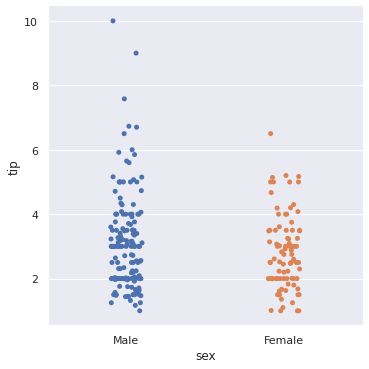

In [37]:
tips = sns.load_dataset("tips")
sns.catplot(x="sex", y="tip", data=tips)

Dilihat pada plot tersebut bahwa pelanggan pria cenderung lebih besar dalam memberikan tip

6. Dari data yang ada apakah ada kecenderungan tips lebih besar di hari-hari tertentu?

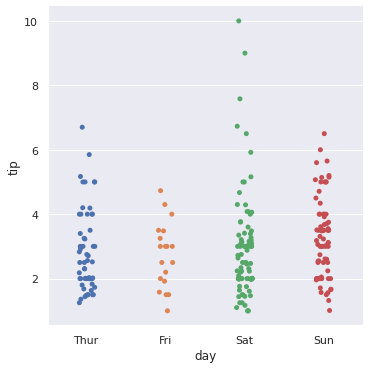

In [38]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="tip", data=tips)

Dilihat pada plot tersebut bahwa pelanggan pada hari sabtu cenderung lebih besar dalam memberikan tip dibandingkan dengan hari-hari lain

7. Dari data yang ada apakah customer perokok cenderung memberi tips lebih besar?

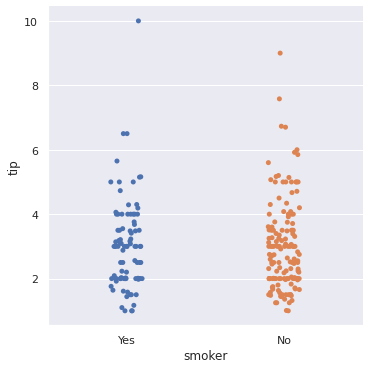

In [44]:
tips = sns.load_dataset("tips")
sns.catplot(x="smoker", y="tip", data=tips)

Dilihat pada plot tersebut bahwa tidak terdapat perbedaan yang signifikan terhadap pelanggan smoker dan non-smoker dalam memberikan tip

8. Apakah pola di nomer 5 dan 7 dipengaruhi hari?

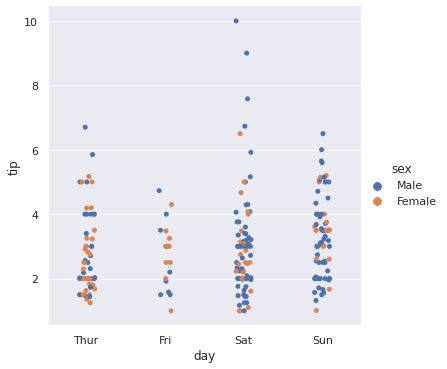

In [45]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="tip", hue="sex", data=tips)

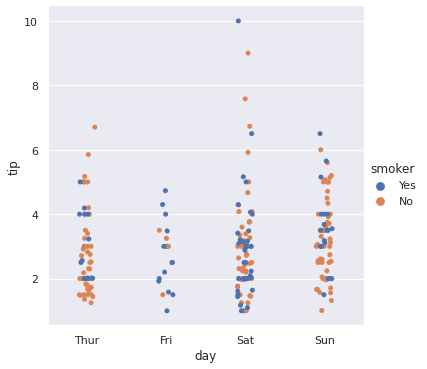

In [46]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="tip", hue="smoker", data=tips)

Dilihat pada plot tersebut bahwa dari pola nomor 5 (berdasarkan jenis kelamin) dan pola nomor 7 (berdasarkan smoker/non-smoker) menunjukkan bahwa hari Sabtu pelanggan-pelanggan berdasarkan kategori tersebut cenderung memberikan tips lebih besar

9. Pola apalagi yang dapat anda temukan? (misal, bisakah anda menyarankan tata letak kursi/meja restaurant dari data ini?)

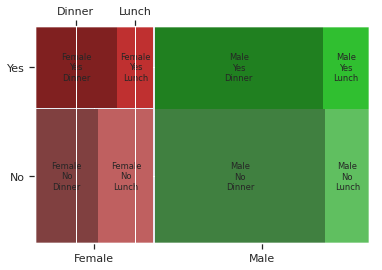

In [50]:
from statsmodels.graphics.mosaicplot import mosaic
p = mosaic(tips, ['sex','smoker','time',])

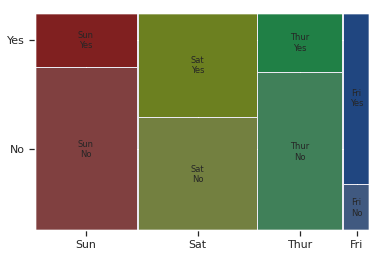

In [52]:
p = mosaic(tips, ['day','smoker'])

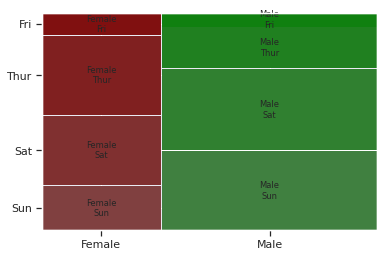

In [60]:
p = mosaic(tips, ['sex','day'])

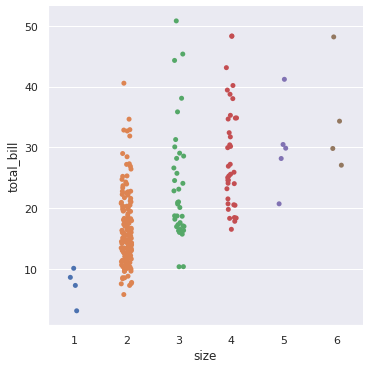

In [61]:
tips = sns.load_dataset("tips")
sns.catplot(x="size", y="total_bill", data=tips)

Dari grafik-grafik tersebut kami dapat menemukan:


1.   Dilihat dari jumlah pelanggan berdasarkan kategori smoker, maka dari itu penataan meja/kursi bisa lebih banyak di non-smoking area pada hari Minggu, dan Kamis dan penataan meja/kursi lebih banyak di smoking area pada hari Jumat
2.   Dilihat berdasarkan kategori waktu (lunch/dinner), pelanggan cenderung lebih banyak datang saat jam makan malam (dinner) sehingga diperlukan jumlah staff yang lebih banyak pada malam hari
3. Dilihat dari penyebaran data total_bill berdasarkan kategori size ditemukan bahwa semakin besar sizenya maka nilai/batas bawah total_bill semakin meningkat



10. Final question: dari hasil EDA anda saran apa saja yang akan anda berikan ke pemilik restaurant? 

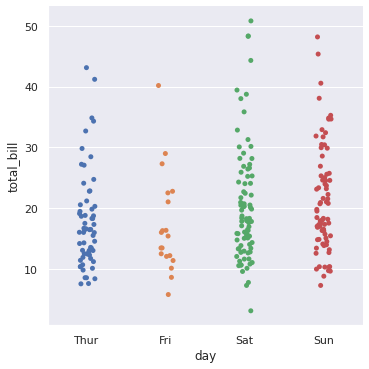

In [59]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips)

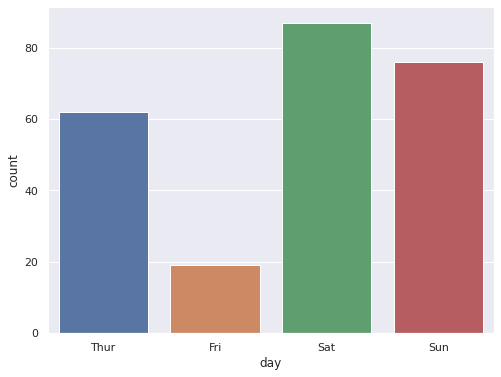

In [58]:
plt.figure(figsize=(8,6))
p = sns.countplot(x="day", data=tips)

Dari grafik-grafik tersebut kami dapat memberikan saran, yaitu:


1.   Restoran dapat memberikan promo atau diskon tertentu di hari Jumat untuk meningkatkan jumlah pelanggan maupun pendapatannya
2.   Restoran dapat menambah hari dibukanya restoran untuk meningkatkan pendapatan

Skills/kompetensi apa yang terasa sangat diperlukan dari latihan ini?

Skills yang diperlukan dalam melakukan latihan ini yaitu kemampuan analisa dalam membaca grafik atau visualisasi data, juga diperlukan kemampuan dasar dalam bahasa pemrograman python